In [ ]:
import alpaca
from alpaca.constants import hbarc_GeVnm
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12, 'text.usetex': True, 'font.family': 'serif', 'font.serif': 'Computer Modern Roman'})
import particle.literals as particles

In [6]:
meas = alpaca.experimental_data.get_measurements('B+ -> K+ a')['Belle II']

In [24]:
fa = np.logspace(2.1, 12, 100)

c_QEDDFSZ = [alpaca.uvmodels.QED_DFSZ.get_couplings({alpaca.uvmodels.beta: np.atan(1)}, f).match_run(5.1, 'VA_below') for f in fa]
br_QEDDFSZ = alpaca.branching_ratio('B+ -> K+ a', 2.0, c_QEDDFSZ, fa, integrator='no_rge')
dw_QEDDFSZ = alpaca.decay_width('a', 2.0, c_QEDDFSZ, fa, integrator='no_rge')
ctau_QEDDFSZ = hbarc_GeVnm / dw_QEDDFSZ * 1e-7 # convert to cm
pinv_QEDDFSZ = meas.decay_probability(ctau_QEDDFSZ, 2.0)

In [25]:
dw_QEDDFSZ_ds = alpaca.decay_width('a', 2.0, c_QEDDFSZ, fa, integrator='no_rge', br_dark=1e-3)
ctau_QEDDFSZ_ds = hbarc_GeVnm / dw_QEDDFSZ_ds * 1e-7 # convert to cm
pinv_QEDDFSZ_ds = meas.decay_probability(ctau_QEDDFSZ_ds, 2.0, br_dark=1e-3)

In [28]:
c_QKSVZ = [alpaca.uvmodels.Q_KSVZ.get_couplings({alpaca.uvmodels.KSVZ_charge: 1}, f).match_run(5.1, 'VA_below') for f in fa]
br_QKSVZ = alpaca.branching_ratio('B+ -> K+ a', 2.0, c_QKSVZ, fa, integrator='no_rge')
dw_QKSVZ = alpaca.decay_width('a', 2.0, c_QKSVZ, fa, integrator='no_rge')
ctau_QKSVZ = hbarc_GeVnm / dw_QKSVZ * 1e-7 # convert to cm
pinv_QKSVZ = meas.decay_probability(ctau_QKSVZ, 2.0)

In [29]:
dw_QKSVZ_ds = alpaca.decay_width('a', 2.0, c_QKSVZ, fa, integrator='no_rge', br_dark=1e-3)
ctau_QKSVZ_ds = hbarc_GeVnm / dw_QKSVZ_ds * 1e-7 # convert to cm
pinv_QKSVZ_ds = meas.decay_probability(ctau_QKSVZ_ds, 2.0, br_dark=1e-3)

In [37]:
c_top = [alpaca.ALPcouplings({'cuR': np.diag([0,0,1])}, 4*np.pi*f, 'derivative_above').match_run(5.1, 'VA_below') for f in fa]
br_top = alpaca.branching_ratio('B+ -> K+ a', 2.0, c_top, fa, integrator='no_rge')
dw_top = alpaca.decay_width('a', 2.0, c_top, fa, integrator='no_rge')
ctau_top = hbarc_GeVnm / dw_top * 1e-7 # convert to cm
pinv_top = meas.decay_probability(ctau_top, 2.0)

In [38]:
dw_top_ds = alpaca.decay_width('a', 2.0, c_top, fa, integrator='no_rge', br_dark=1e-3)
ctau_top_ds = hbarc_GeVnm / dw_top_ds * 1e-7 # convert to cm
pinv_top_ds = meas.decay_probability(ctau_top_ds, 2.0, br_dark=1e-3)

In [42]:
c_flax = [alpaca.uvmodels.flaxion_benchmark.get_couplings(0.2, 4*np.pi*f).match_run(5.1, 'VA_below') for f in fa]
br_flax = alpaca.branching_ratio('B+ -> K+ a', 2.0, c_flax, fa, integrator='no_rge')
dw_flax = alpaca.decay_width('a', 2.0, c_flax, fa, integrator='no_rge')
ctau_flax = hbarc_GeVnm / dw_flax * 1e-7 # convert to cm
pinv_flax = meas.decay_probability(ctau_flax, 2.0)

In [43]:
dw_flax_ds = alpaca.decay_width('a', 2.0, c_flax, fa, integrator='no_rge', br_dark=1e-3)
ctau_flax_ds = hbarc_GeVnm / dw_flax_ds * 1e-7 # convert to cm
pinv_flax_ds = meas.decay_probability(ctau_flax_ds, 2.0, br_dark=1e-3)

In [59]:
c_nonuniv = [alpaca.uvmodels.nonuniversal_DFSZ.get_couplings({alpaca.uvmodels.beta: np.atan(10)}, 4*np.pi*f).match_run(5.1, 'VA_below') for f in fa]
br_nonuniv = alpaca.branching_ratio('B+ -> K+ a', 2.0, c_nonuniv, fa, integrator='no_rge')
dw_nonuniv = alpaca.decay_width('a', 2.0, c_nonuniv, fa, integrator='no_rge')
ctau_nonuniv = hbarc_GeVnm / dw_nonuniv * 1e-7 # convert to cm
pinv_nonuniv = meas.decay_probability(ctau_nonuniv, 2.0)

In [60]:
dw_nonuniv_ds = alpaca.decay_width('a', 2.0, c_nonuniv, fa, integrator='no_rge', br_dark=1e-3)
ctau_nonuniv_ds = hbarc_GeVnm / dw_nonuniv_ds * 1e-7 # convert to cm
pinv_nonuniv_ds = meas.decay_probability(ctau_nonuniv_ds, 2.0, br_dark=1e-3)

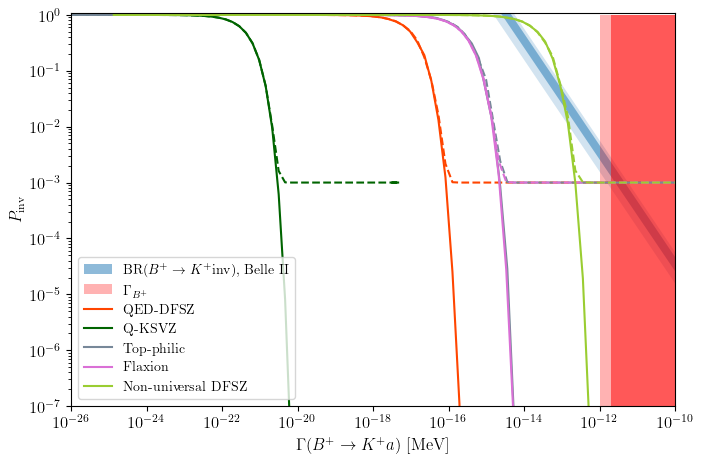

In [ ]:
plt.figure(figsize=(18/2.5, 12/2.5))

GammaB = particles.B_plus.width
Gamma_BKa = np.logspace(-12, 0, 100)*GammaB
bound_low_1sigma = meas.get_central(2.0) - meas.get_sigma_left(2.0)
bound_high_1sigma = meas.get_central(2.0) + meas.get_sigma_right(2.0)
bound_low_2sigma = meas.get_central(2.0) - 2*meas.get_sigma_left(2.0)
bound_high_2sigma = meas.get_central(2.0) + 2*meas.get_sigma_right(2.0)
plt.fill_between(Gamma_BKa, GammaB/Gamma_BKa*bound_low_1sigma/(1-bound_low_1sigma), GammaB/Gamma_BKa*bound_high_1sigma/(1-bound_high_1sigma), alpha=0.5, lw=0, label=r'$\mathrm{BR}(B^+ \to K^+ \mathrm{inv})$, Belle II')
plt.fill_between(Gamma_BKa, GammaB/Gamma_BKa*bound_low_2sigma/(1-bound_low_2sigma), GammaB/Gamma_BKa*bound_high_2sigma/(1-bound_high_2sigma), alpha=0.2, lw=0, color='tab:blue')
plt.fill_between([particles.B_plus.width_upper, GammaB], 1e-7, 1, alpha=0.3, lw=0, color='r', label=r'$\Gamma_{B^+}$')
plt.fill_between([2*particles.B_plus.width_upper, GammaB], 1e-7, 1, alpha=0.5, lw=0, color='r')

plt.loglog(br_QEDDFSZ * GammaB, pinv_QEDDFSZ, c='orangered', label='QED-DFSZ')
plt.loglog(br_QEDDFSZ[5:] * GammaB, pinv_QEDDFSZ_ds[5:], c='orangered', ls='--')

plt.loglog(br_QKSVZ * GammaB, pinv_QKSVZ, c='darkgreen', label='Q-KSVZ')
plt.loglog(br_QKSVZ[7:] * GammaB, pinv_QKSVZ_ds[7:], c='darkgreen', ls='--')

plt.loglog(br_top * GammaB, pinv_top, c='lightslategrey', label='Top-philic')
plt.loglog(br_top[7:] * GammaB, pinv_top_ds[7:], c='lightslategrey', ls='--')

plt.loglog(br_flax * GammaB, pinv_flax, c='orchid', label='Flaxion')
plt.loglog(br_flax[7:] * GammaB, pinv_flax_ds[7:], c='orchid', ls='--')

plt.loglog(br_nonuniv * GammaB, pinv_nonuniv, c='yellowgreen', label='Non-universal DFSZ')
plt.loglog(br_nonuniv[7:] * GammaB, pinv_nonuniv_ds[7:], c='yellowgreen', ls='--')

plt.ylim(1e-7, 1.1)
plt.xlim(1e-26, 1e-10)
plt.xlabel(r'$\Gamma(B^+ \to K^+ a)$ [MeV]')
plt.ylabel(r'$P_\mathrm{inv}$')
plt.legend(loc='lower left', fontsize=10)
plt.tight_layout()
#plt.savefig('Pinv_btoknunu.pdf', bbox_inches='tight', dpi=400)